# Assignment: Customer Retention Prediction
---

## Goal:
Build a predictive model that determines whether a customer is likely to close their account within the next 3 months.

## Approach:
Based on the problem statement as well as the requirements listed, the following steps will be taken; these will be explored individually in detail below.

1. **Data Exploration and Understanding:** 
>1.1 **Data Collection:** Relevant information should be gathered including historical data on customer transactions, account closures, returns and personal information.  
>1.2 **Data Inspection:** Data structures should be explored and information fully understood. Data types should also be understood and data checked for missing values.

2. **Data Preparation:** 
>2.1 **Feature Selection:** Relevant data should be indentified and redundant data removed.  
>2.2 **Personal Information Abstraction and Aggregation:** To comply with data regulations, personal data that could be used to identify individuals should be avoided or aggregated in cases where data could be useful for the model.  
>2.3 **Data Cleaning:** Null or empty values should be accounted for and duplicate entries removed.

3. **Feature Engineering:**
>3.1 **Categorical and Temporal Variable Encoding:** Categorical variables and temporal data should be encoded to allow for use in machine learning methods.  
>3.2 **Existing Feature Adjustment:** Features that might suffer from skewness, outliers or sparsity should be adjusted.  
>3.3 **Additional Feature Creation:** Composite features that might capture important information should be generated.    

4. **Model Creation:** 
>4.1 **Target Variable Definition:** A suitable target variable should be chosen.  
>4.2 **Model Selection:** A suitable model should be selected for the specific problem.  
>4.3 **Initial Parameter Selection:** Parameters for the specified model should be selected.

5. **Data Pre-processing:** 
>5.1 **Data Scaling:** Data should be normalized to ensure consistency and speed of training.  
>5.2 **Split Data:** Data should be split into training, validation and testing sets to an appropriate ratio based on dataset size.

6. **Model Training:** 
> Train model on training data.

7. **Model Evaluation:** 
>7.1 **Choose and Measure Evaluation Metric** An appropriate metric should be selected based on chosen model, target variable and task at hand, and evaluated on the model's performance on the validation set.  
>7.2 **Plot Learning against Validation** The models learning over separate epochs should be graphed and inspected for evaluation of converging behaviour e.g. overfitting, underfitting. 

8. **Uncertainty Expression:** 
> Methods to quantify uncertainty should be employed on predictions.

9. **Model Testing:** 
> Test model against testing data.

10. **Hyperparameter Tuning:** 
> Based on model's performance on the test set hyperparameters should be tuned. Features could be revisited if necessary. 

11. **Communicating Outcomes:**
>11.1 **Reporting** A report outlining the essentials of the above steps including data preprocessing, feature engineering, model selection, training and evaluation metrics should be drafted.  
>11.2 **Visualising** Relevant visuals should be created that enhance understanding and interpretability for stakeholders.

12. **Maintenance and Updating**
> Model should be re-visited when updated on input data or processes are made.  

---

### Programming Language of Choice
The following steps are taken with **Python 3** in mind. The main reason is due to its extensive amount of libraries for machine learning such as TensorFlow, PyTorch, Keras and scikit-learn. Additionally, python's ease of use and versatility make it an excellent language for initiating new projects which can be expanded on later on.

The suggested libraries for this project are **Pandas**, for data cleaning and pre-processing, and **Tensorflow** or **PyTorch**, for machine learning implementation. Tensorflow and PyTorch are suggested for this project over other libraries such as Keras for their flexibility in architecture experimentation.

---

### 1. Data Exploration and Understanding
The data structure appears to be a simple database of 5 tables with simple variables such as strings, floats, dates, booleans and enums. To better understand the structure and more importantly the relationship between the tables a visualisation tool is utilised (*See below*). The information in the database is straightforward and does not warrant further questioning.

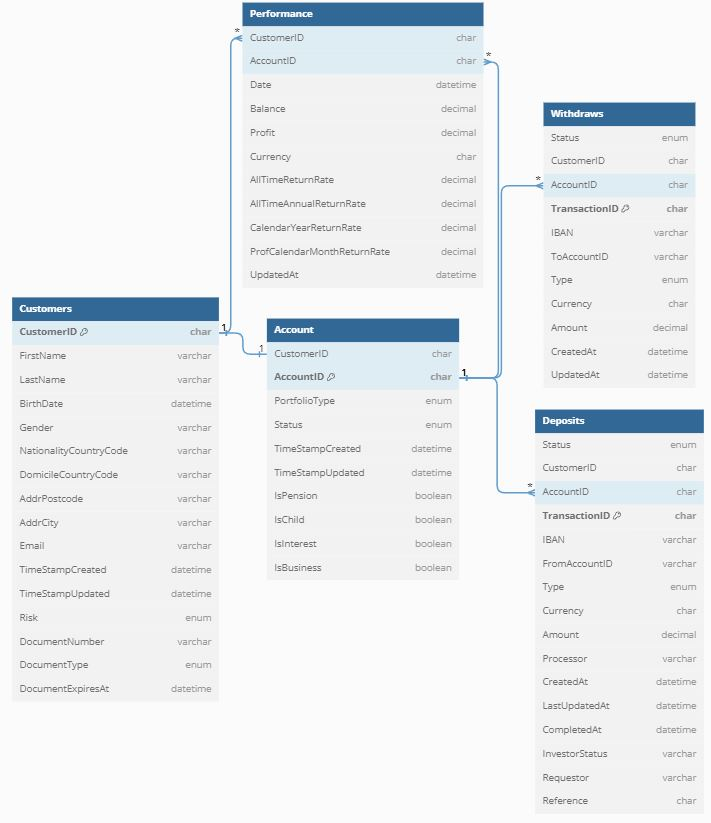

### 2. Data Preparation
To begin with, redundant data or data that is unlikely to provide meaningful information is removed. In this case, personal information such as the customers **first name**, **last name**, **email**, **document number** and **document type** are removed. Additionally, due to the given assumption that one customer has only  one account, the **Customers** and **Account** table can be merged with the **AccountID** variable being removed entirely as tables can be linked by **CustomerID** alone. For this purpose, **Withdraws.ToAccountID** and **Deposits.FromAccountID** need to be refactored to correctly indicate **CustomerID** instead.  

Before encoding information, one more variable needs to be adjusted in order to adheer to GDPR regulations. Namely, **Customers.BirthDate** can be used to indirectly identify an individual when combined with other data (https://gdpr.eu/eu-gdpr-personal-data/). However, as the date of birth of a customer might be important for behavioural data, we can keep the year (and even the month if data is reasonably large).  

Lastly, repeat data entries and null data need to be accounted for. Fortunately, the provided data structure does not allow for NULL values for the selected features, hence not more processing needs to be done here.

### 3. Feature Engineering: 

Machine learning methods commonly utilise numerical data and as such encoding methods will need to be emploeyed to tansform categorical data. Different encoding techniques need to be used not only depending on the data type of the input variable but also depending on the purpose of the feature in learning. Below I will expand with the suggested encoding for each categorical variable.
- **Datetime**: Datetime variables are commonly split to their components (year, month, day, seconds etc), with fields utilizing **ordinal encoding** to preserve sequentiality. While we will also use this method as the default for datetime variables, ordinal encoding is limited in terms of prediciting complex temporal patterns. As such, for datetime variables in the Withdraws, Deposits and Performance tables, **cyclical encoding** with sine/cosine functions (https://www.thedataschool.com.au/ryan-edwards/feature-engineering-cyclical-variables/) will be used for month and days instead which will be more likely to yield dynamic patterns related to habitual behaviours. 
- **Enums**: **One-hot encoding** is the conventional approach when it comes to enums. One-hot encoding is suitable when the model is required to treat each entry independently without implying any ordinal relationship. Additionally, one-hot encoding ensures that their is no bias in the data from false sequentiality assumptions *e.g. label 2 is more valuable than label 1 due to number magnitude*.
- **Strings (char, varchar)**: When working with strings **one-hot encoding** is also commonly used. However, this method is not as efficient in categories with a large amount of unique entries which may result in high dimensionality of the feature space and in turn large training times. In those cases, techniques such as collapsing variables and count encoding may be employed. However, no variable in this data structure warranted the aforementioned.

Below is an updated visualisation of the adjusted data structure with its data types changed to represent the encoding type. For the sake of visualisation simplicity, one-hot encoded variables are grouped up into one feature. Features with the encoding type 'temp' are only there for visualisation purposes and will be removed or engineered in further steps.

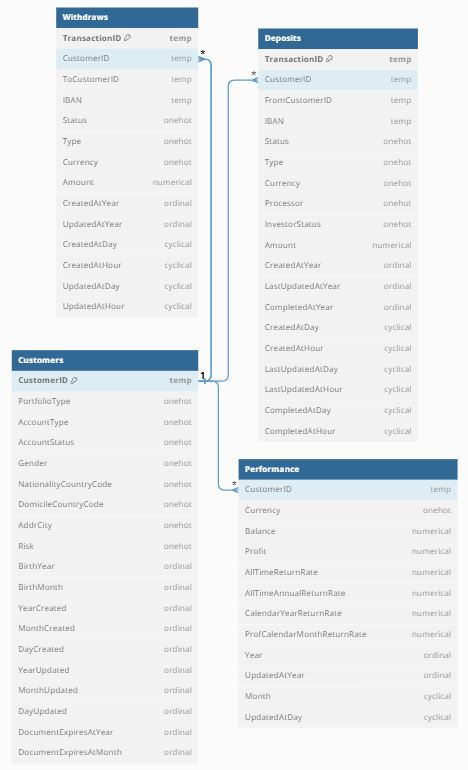

Some of the features are likely to suffer from statistical biases. More specifically, financial data is commonly known to suffer from shifted distributions and skewness due to compounding effects and extreme outliers. Normalisation is a great tool for adjusting shifted distributions which will be utilised at further steps, however, normalisation can be detremental to a model if the extreme outliers are not handled. For financial data such as the **Balance** and **Profit** in the **Permformance** table, a **logarithmic function** could be utilised to adjust for compounding effects as well as for effects of inflation. Alternatively, **frequency binning** could also allow for an improved distribution representation. Another advantage of binning is its robustness to noise, which will be important when dealing with a variety of currencies within the same model.

The flexibility of pattern detection of a dynamic machine learning model is largely dependent on the possibilites enabled by its inputs. Simply put, if all input features are linear then the model will also result in merely detecting linear relationships. As such methods such as **feature crossing** are employed, creating composite features which are a result from the product of other features. It is important to note that while the possibilities for feature crossing are vast, even so with a larger amount of input features, this area is one that requires iterative development and deeper understanding of the problem at hand. Henceforth, feature crossing will benefit from the knowledge and suggestions of other departments. Nevertheless, here are a couple of suggested feature crosses given the problem at hand:
- **Withdrawal-to-Deposit ratio**
- **Binned Balance** X **Withdrawal-to-Deposit ratio** 
- **Account Age** X **Withdrawal-to-Deposit ratio**
- **Account Type** X **Withdrawal-to-Deposit ratio**
- **Average Transaction Amount** X **Return Rate**
- **Transaction Frequency** X **Account Balance**
- **Account Type** X **Return Rate**
- **Account Age** X **Return Rate**
- **Binned Balance** X **Domicile Country**
- **Binned Balance** X **Account Age** 
- **Account Age** X **Binned Balance** X **Return Rate**
- **Binned Profit** X **Binned Profit**

### 4. Model Creation
Before selecting a target variable and model, the problem needs to be categorized between classification or regression. The problem statement suggests calculating the probability of a customer leaving in the coming 3 months, which would make this a regression problem. **Regression** is an excellent method for continuous value prediction and for a finer-grained understanding and assessment of risk. **Classification** methods on the other hand offer a more interpretable outcome for stakeholders by simplyfing outcome to a binary decision or even to several categories such as Low, Medium, High risk. Just like before, this step is dependent on the business needs of the system which should be discussed between the stakeholders. For the purpose of this assignment, a regression model is assumed. 

As the outcome of a Regression problem is continuous, such should be the nature of the output or comparison variable. The probability of the customer leaving in the coming 3 months, henceforth ***P(L)*** is a suitable target variable and can be calculated from conditional probabilities within the given data.

With a comparison variable selected and type of problem identified, a machine learning model can be created. It is important to note that just like many steps in the machine learning pipeline, this and the upcoming steps are subject to continuous iteration and incremental improvement. As a starting model, a **logistic regression** model would be a great starting point, offer a quick and easy method for understanding the nature of the input data. However, logisitc regression is limited to linear relationships and thus not suitable for adequtaly capturing complex relationships. For that purpose and given the nature of the problem and data, a neural network is suggested. In particular, taking into consideration the sequential nature of some data, a **Recurrent Neural Network (RNN)** architecture should be selected. Altenatively, depending on the current model performance, a **Long Short-Term Memory (LSTM)** architecture could be opted for. 

Perhaps the most iterative and challenging step in any machine learning pipeline is the selection of hyperparameters. The best hyperparameters for a problem require vast experimentation or time consuming methods such as grid search and random search. Given the choices up to this point here are the suggested starting hyperparameters:
- **Learning Rate:** Starting value = 0.001, with incremental decrease over time to allow for better convergence if needed
- **Number of Layers:** Starting with 1 and increasing layers is common practise, especially for RNNs. For deeper networks, regulization might be needed. Deeper networks require larger dataset and more computational resources.
- **Number of Hidden Neurons:** Depends on sample size and number of input features, typically 2/3 of the amount of input features
- **Dropout Rate:** Starting value 0.2-0.5
- **Batch Size:** Starting value 32-128
- **Epochs:** 1000 with early stopping
- **Activation Function:** Hyperbolic Tangent (tanh) or Rectified Linear Unit (RelU)
- **Optimize:** Adam
- **Loss Function:** Mean Squared Error (MSE), might depend on evaluation metric
- **Output Layer:** Softmax

### 5. Data Pre-processing:

To ensure that no one feature has a more significant effect than another as well as to ensure consistency and speed of training, input data needs to be scaled appropriately. **Normalization** is a suitable method for this step, making all numerical values scale between 0 and 1.

Before training, data should be split into training, validation and testing sets. The ratio of this data is highly dependent on the amount of entries in the dataset. Ideally, a **90-5-5** ratio is utilised for a large dataset, however ratios can be scaled down to a ratio of 60-20-20 for very small datasets. Naturally, a larger training set allows for improved training. 

### 6. Model Training

The model should be trained on the training set and evaluated against the validation set. Convergence behaviour of test loss against validation loss should be monitored and issues addressed by adjusting hyperparameters in further iterations.

### 7. Model Evaluation

There are many metrics to choose from, all with different purposes and dependent on the task at hand. For regression problems, **Mean Squared Error (MSE)** is commonly utilised, which was also suggested for the loss function of the architecture. In the current case, **R-squared (R2)** score can also be employed to measure the goodness of fit of our model. For the former, a score closer to 0 is ideal and for the latter, the higher the score the better.

### 8. Uncertainty Expression

Modelling uncertainty in a prediction traditionally employees a combination of methods to better understand outcomes. As our suggested system is working with probabilities, **Bayesian Neural Networks (BNNs)** should be adequate for quantifying uncertainty. **Bootstrapping** can also be used where multiple models are tested against similar data and the variance of the outcomes compared. 

### 9. Model Testing

After achieving a sufficiently performing model, the test set should be utilised for model testing. As the testing data is independent of training and validation, this should provide us with a good measure of how the system will perform in a real-world scenario.

### 10. Hyperparameter Tuning

Depending on the outcome of testing hyperparameters should be revisited and tuned, re-iterating from **step 5**. If judged necessary re-iterating from or **step 3** might also be needed. For the latter, feature importance should also be investigated to inspect how vital each input feature is for the prediction. A good starting method for this is **Permutation Feature Importance (PFI)**, which permutates one individual feature every time to determine its importance in the final outcome. 

### 11. Communicating Outcomes

System outcomes should be easily understandable and the stakeholders should have trust in the system. Similarly, sufficient knowledge of development of the current iteration will aid further iterations. As such, the development of the system should be documented, outlining decision rationales for data processing steps, feature engineering, model selection etc. Where appropriate, relevant visualisation can aid in understanding and interpretation of results. 

### 12. Maintenance and Updating
As frequently mentioned in this report, machine learning models are highly iterative with each iteration improving on the previous one. Therefore, the model should be re-visited to further increase its predictive power and adjusted when changes to input data are made.

---

## Conclusion

Here we suggest a machine learning method for aiding customer retention. The report motivates the choice of a Neural Network utilizing a Recurrent Neural Network achitecture for a probability Regression problem and outlines the steps needed for pre-processing and incremental adjustments. 